<h1 style="font-size:3rem;color:orange;">Assignment 4</h1>

# Problem 1
####  In this problem, you will predict tumor type from gene expression data. Since there are many more gene features than observations of patients, we will use ridge and LASSO regularization for logistic regression to reduce overfitting and help select the most relevant features out of a large group of features. This dataset has a multi-class outcome variable. The possible tumor types are BRCA, COAD, KIRC, LUAD, or PRAD. You will analyze this dataset by building a multinomial regression model with 1 and 2 regularization. The recommended approach is the glmnet package in R, which is covered in the code in class. You can check the “Multinomial Regression” section found at this link for specific information about multinomial regression in glmnet.

#### (a) Load the labels and data with read.csv. Remove any columns with missing entries. Remove any columns with variance less than 0.001. Standardize each gene predictor column to have mean 0 and standard deviation 1 (this is important when doing regularized regression). Split the dataset randomly into a training and validation set.

In [1]:
#%% Step 1 - Load Data & Prep Data
import pandas as pd;

x = pd.read_table('C:/Users/danma/Downloads/gene_data.csv', sep=",",)
y = pd.read_table('C:/Users/danma/Downloads/gene_labels.csv', sep=",",)

#possibly remove sample name column
x = x.iloc[: , 1:]
y = y.iloc[: , 1:]
 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y = enc.fit_transform(y)
y = pd.DataFrame(y, columns = ["Class"])

print(x.head())
print(y.head())
#%% Step 2 - Remove Variance < 0.001
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.001)
selector.fit(x)

concol = [column for column in x.columns 
          if column not in x.columns[selector.get_support()]]

#print("Columns with Variance < 0.001")
#for features in concol:
#    print(features)
    
x_reduced = x.drop(concol,axis=1)

del concol, selector
#%% Step 3 - Standardize the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_reduced)

x_scaled = pd.DataFrame(x_scaled, columns = x_reduced.columns)#return to dataframe with column names

del x_reduced, scaler, x
#%% Step 4 - Split Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y)
print(x_train.dtypes)
del y

   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.92

#### (b) Use ridge logistic regression with 10-fold cross validation to model the response given the gene expression predictors. What is your optimal value of the regularization parameter λ? Apply your model to give predictions using the optimal value of λ. Make a confusion matrix showing the accuracy of your model on the training and test set.

Ridge optimal λ =  1e-15
[[69  5  0  0  0]
 [ 0 17  1  0  0]
 [ 0  0 38  0  0]
 [ 0  0  4 28  0]
 [ 0  0  0  2 37]]


Text(0.5, 1.0, 'Ridge Confusion Matrix')

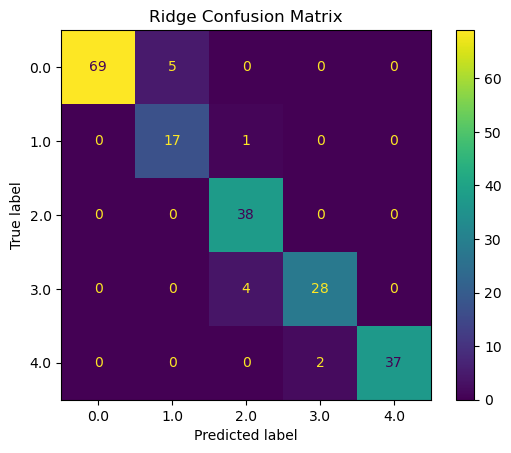

In [2]:
#%% Step 4.5 Testing Logistic Regression and RidgeClassification to ensure that they yield the same results, which they did meaning that Ridge as a package alone works for L2 Regularization while running quicker than both.
#from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')
#clf = LogisticRegressionCV(cv=10, random_state=0, Cs=list_alphas, penalty="l2", solver="saga", n_jobs=-1, multi_class="multinomial", max_iter=5000).fit(x_train, y_train.values.ravel())
#print(clf.Cs)

#y_ridge_pred = clf.predict(x_test)  
#from sklearn.linear_model import RidgeClassifierCV
#list_alphas = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]
#clf = RidgeClassifierCV(cv=10, alphas=list_alphas).fit(x_train, y_train.values.ravel())
#print("Ridge optimal λ = ",clf.alpha_)

#y_ridge_pred = clf.predict(x_test)

#from sklearn.metrics import confusion_matrix
#using ravel to create single array and round to create classifier prediction for confusion matrix
#print(confusion_matrix(y_test.values.ravel(),y_ridge_pred.round(0)))
#matrix shows exact match

#%% Step 5 - Ridge Regression, 10 Fold, Optimal Lambda, Confusion Matrix Accuracy
from sklearn.linear_model import RidgeCV
import numpy as np
#list_alphas = np.logspace(-15, 1.35, 400) ran large range but defaulted at the 1e-15 after a 5 min run
list_alphas = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]
clf = RidgeCV(cv=10, alphas=list_alphas).fit(x_train, y_train.values.ravel())
print("Ridge optimal λ = ",clf.alpha_)

y_ridge_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
#using ravel to create single array and round to create classifier prediction for confusion matrix
cm = confusion_matrix(y_test.values.ravel(),y_ridge_pred.round(0))
print(cm)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test.values.ravel(),y_ridge_pred.round(0))
disp.ax_.set_title("Ridge Confusion Matrix")


#### (c) Use LASSO logistic regression with 10-fold cross validation to model the response given the gene expression predictors. What is your optimal value of the regularization parameter λ? Apply your model to give predictions using the optimal value of λ. Make a confusion matrix showing the accuracy of your model on the training and test set.

LASSO optimal λ =  0.01720736162119889
[[72  2  0  0  0]
 [ 1 16  1  0  0]
 [ 0  0 38  0  0]
 [ 0  1  4 27  0]
 [ 0  0  1  3 35]]


Text(0.5, 1.0, 'LASSO Confusion Matrix')

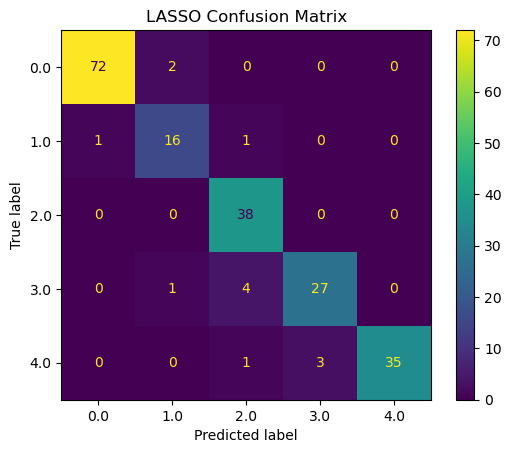

In [3]:
#%% Step 6 - LASSO Regression, 10 Fold, Optimal Lambda, Confusion Matrix Accuracy
from sklearn.linear_model import LassoCV
list_alphas = np.logspace(-15, 1.35, 400)
reg = LassoCV(cv=10, alphas=list_alphas, n_jobs=-1, positive=True).fit(x_train, y_train.values.ravel())
print("LASSO optimal λ = ",reg.alpha_)

y_lasso_pred = reg.predict(x_test)

cm = confusion_matrix(y_test.values.ravel(),y_lasso_pred.round(0))
print(cm)
#matrix shows incorrect guesses and a wider range
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test.values.ravel(),y_lasso_pred.round(0))
disp.ax_.set_title("LASSO Confusion Matrix")

#### (d) Give a list of the top 20 most relevant genes that are selected by your LASSO model at the optimal value of λ. The coefficients for a multinomial regression model will be a p × C matrix where C is the number of classes and p is the number of feature columns. What relation do your selected genes have to tumor expression? You can determine this by looking at which of the C coefficients associated with a certain gene are non-zero. Positive values in a certain index correspond to a high probability of the tumor associated with that index, while negative values correspond to a lower probability.

Top 20 Most Relevant Genes from LASSO:

╒════════════╤═══════════╕
│ gene       │      coef │
╞════════════╪═══════════╡
│ gene_7964  │ 0.239987  │
├────────────┼───────────┤
│ gene_17801 │ 0.148374  │
├────────────┼───────────┤
│ gene_15895 │ 0.139831  │
├────────────┼───────────┤
│ gene_9175  │ 0.104834  │
├────────────┼───────────┤
│ gene_15896 │ 0.0934613 │
├────────────┼───────────┤
│ gene_14798 │ 0.0836215 │
├────────────┼───────────┤
│ gene_6748  │ 0.0776556 │
├────────────┼───────────┤
│ gene_17354 │ 0.0602209 │
├────────────┼───────────┤
│ gene_17947 │ 0.0560126 │
├────────────┼───────────┤
│ gene_15897 │ 0.0537163 │
├────────────┼───────────┤
│ gene_1985  │ 0.0500587 │
├────────────┼───────────┤
│ gene_17770 │ 0.0496268 │
├────────────┼───────────┤
│ gene_16372 │ 0.0472182 │
├────────────┼───────────┤
│ gene_3448  │ 0.044937  │
├────────────┼───────────┤
│ gene_1096  │ 0.0384208 │
├────────────┼───────────┤
│ gene_11352 │ 0.0375544 │
├────────────┼───────────┤
│ gene_4178  │ 

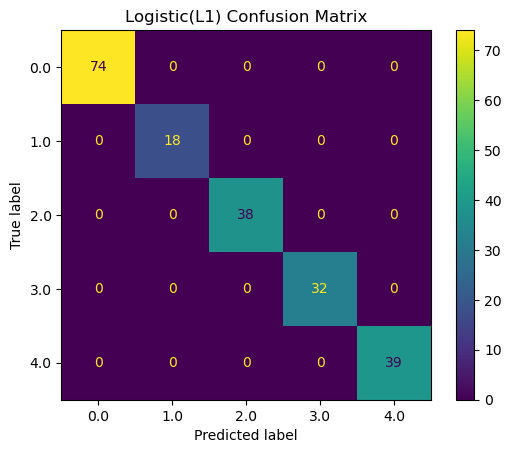

In [4]:
#%% Step 7 - 20 Most Relevant Predictors from LASSO
#%% Step 7.1 - Fitting Logistic Regression to get Coef for all Tumors
from sklearn.linear_model import LogisticRegression
#fitting Logistic Regression for All Coefficients
lasso = LogisticRegression(C=(1/reg.alpha_), penalty="l1", solver="saga", n_jobs=-1, max_iter=5000)
lasso.fit(x_train, y_train.values.ravel())

y_pred = lasso.predict(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test.values.ravel(),y_pred)
disp.ax_.set_title("Logistic(L1) Confusion Matrix")

#%% Step 7.2 - Pull Coefficient Matrix from Logistic Regression
imp = lasso.coef_
imp = imp.transpose()
#%% Step 7.3 - Coefficients from LASSO model
import numpy as np
importance = pd.DataFrame({'gene': reg.feature_names_in_, 'coef': reg.coef_}, columns=['gene', 'coef'])
importancesorted = importance.sort_values(by=['coef'], ascending=False)
top20 = importancesorted.head(20)
print("Top 20 Most Relevant Genes from LASSO:\n")
from tabulate import tabulate
print(tabulate(top20, headers='keys', tablefmt='fancy_grid', showindex=False))
#%% Step 8 - Relation of Genes to Tumors
#%% Step 8.1 - Top20(LASSO) from LogReg
cat = enc.categories_[0]
importance[enc.categories_[0]] = imp
importancesorted = importance.sort_values(by=['coef'], ascending=False)
top20 = importancesorted.head(20)
print("Top 20 Most Relevant Genes from LASSO with Coefficients from LogReg(L1):\n")
from tabulate import tabulate
print(tabulate(top20, headers='keys', tablefmt='fancy_grid', showindex=False))
#%% Step 8.2 - Relation
#swap negatives for low, positives for high, zeros for none
values = top20.iloc[: , -5:]
values[values < 0] = -1
values[values > 0] = 1

mapping = {1:'high prob', -1:'low prob', 0:'no relation'}
values = values.astype(int).replace({'BRCA': mapping, 'COAD': mapping, 'KIRC': mapping, 'LUAD': mapping, 'PRAD': mapping})
#drop coef column, and print new dataframe with labels rather than numerical coef
values.insert (0, 'gene', top20['gene'])

from tabulate import tabulate
print(tabulate(values, headers='keys', tablefmt='fancy_grid', showindex=False))

#### Note: If columns are highly correlated, LASSO will often arbitrarily select a single column, so a full report of relevent genes would involve predictors selected by LASSO and genes that are highly correlated. Other techniques like group LASSO can select subsets of related genes, these will not be covered in this class. You could also try to combine the 1 and 2 penalties to get representation of meaningful predictors that are also correlated (see the reference material above).